# Chapter 1: The Scrolls of Dataopolis

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AEP_hourly.csv')

# Convert the datetime column to datetime format and set it as the index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Display the first few rows of the dataset
print(df.head())


                      AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0


# Chapter 2: The Average Consumption Ritual

In [8]:
# Resample to get the mean energy consumption per hour
hourly_consumption = df['AEP_MW'].resample('H').mean()

# Calculate the average energy consumption per hour
average_consumption_per_hour = hourly_consumption.mean()
print(f"Average Energy Consumption per Hour: {average_consumption_per_hour:.2f}")


Average Energy Consumption per Hour: 15499.65


# Chapter 3: The Poisson Valley

In [23]:
# Import packages
import numpy as np
import plotly.graph_objects as go
from scipy.stats import poisson

# Generate the pmf
k = np.arange(14500, 16500)
y = poisson.pmf(k, mu=15499.65)

# Create plot
fig = go.Figure(data=go.Scatter(x=k, y=y, mode='lines'))
fig.update_layout(title='Poisson PMF',
                  xaxis_title='k: MW of energy consumed in an hour',
                  yaxis_title='Probability',
                  font=dict(size=18),
                  width=650,
                  title_x=0.5,
                  height=400,
                  template="simple_white")
fig.show()

The bar plot shows the probability of consuming different numbers of energy units in a given hour, according to the Poisson distribution.

# Chapter 4: The Comparison of Realms

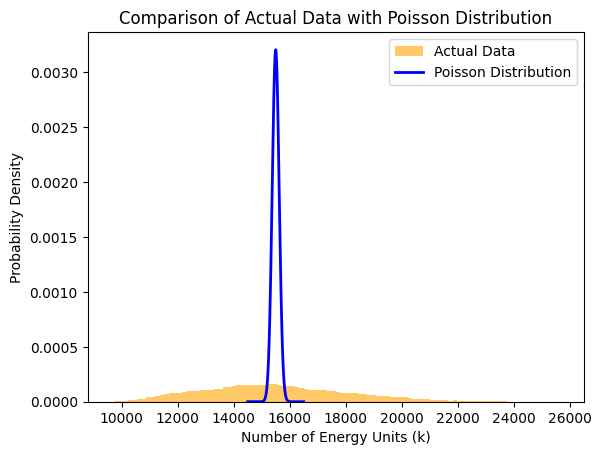

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Generate the Poisson PMF with an adjusted range that matches your actual data
k = np.arange(14500, 16500)
y = poisson.pmf(k, mu=15499.65)  # Set mu to the mean of actual data

# Plot the histogram of the actual data with a larger number of bins
plt.hist(df['AEP_MW'], bins=100, density=True, alpha=0.6, color='orange', label='Actual Data')

# Plot the Poisson distribution as a line plot
plt.plot(k, y, color='blue', linewidth=2, label='Poisson Distribution')

# Add labels and title
plt.xlabel('Number of Energy Units (k)')
plt.ylabel('Probability Density')
plt.title('Comparison of Actual Data with Poisson Distribution')
plt.legend()

# Show the plot
plt.show()






The histogram shows the actual distribution of energy consumption, with the Poisson distribution overlaid for comparison.

# **Chapter 5: The Revelation**
Analysis:

Fit of the Poisson Model:

The Poisson distribution provides a model for understanding the probability of consuming a specific number of energy units per hour based on the average rate.
However, the actual data shows a much more spread-out distribution compared to the Poisson model, indicating that the Poisson distribution might not fully capture the complexity of the energy consumption pattern in Dataopolis.

Discrepancies:

The discrepancies between the actual data and the Poisson model suggest that other factors influence energy consumption, such as time of day, seasonality, or external events. These factors lead to a wider range of energy usage than what the Poisson distribution predicts.


Practical Implications:

While the Poisson distribution is useful for modeling and predicting events in many situations, real-world energy consumption is likely driven by more complex patterns. Analysts must consider additional models or adjustments, such as considering peak hours, trends, or even machine learning approaches, to make more accurate predictions.